<a href="https://colab.research.google.com/github/beccashamus23/ML_NYC_housing_project/blob/main/pca_and_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data and Info

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [275]:
data = pd.read_csv("drive/MyDrive/DSML/NYChousing.csv")

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22073 entries, 0 to 22072
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Boro-Block-Lot           22073 non-null  object 
 1   Address                  22073 non-null  object 
 2   Neighborhood             22073 non-null  object 
 3   Building Classification  22073 non-null  object 
 4   Total Units              22073 non-null  int64  
 5   Year Built               22000 non-null  float64
 6   Gross SqFt               22073 non-null  int64  
 7   Estimated Gross Income   22073 non-null  int64  
 8   Estimated Expense        22072 non-null  float64
 9   Net Operating Income     22073 non-null  int64  
 10  Full Market Value        22071 non-null  float64
 11  Report Year              22073 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.0+ MB


In [277]:
data = data.drop(["Boro-Block-Lot"], axis=1)

In [278]:
data.head()
data = data.drop(data[data['Year Built'] == 0].index)

Filter only top neighborhoods

In [279]:
data['Neighborhood'] = data['Neighborhood'].replace({'UPPER WEST SIDE (59-79)': 'UPPER WEST SIDE',
                                                 'UPPER EAST SIDE (79-96)': 'UPPER EAST SIDE',
                                                  'UPPER EAST SIDE (59-79)': 'UPPER EAST SIDE',
                                                 'UPPER WEST SIDE (79-96)': 'UPPER WEST SIDE',
                                                  'UPPER WEST SIDE (59-79)': 'UPPER EAST SIDE',
                                                     'UPPER WEST SIDE (96-116)': 'UPPER WEST SIDE',})
n_counts = data['Neighborhood'].value_counts()
selected_n = n_counts[n_counts >= 300].index
data = data[data["Neighborhood"].isin(selected_n)]

In [192]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Units,12129.0,6.500717e+01,9.217159e+01,1.0,15.0,30.0,76.0,1258.0
Year Built,12100.0,1.967684e+03,4.082314e+01,1853.0,1925.0,1986.0,2005.0,2018.0
Gross SqFt,12129.0,8.077065e+04,1.101817e+05,1.0,19031.0,39438.0,95307.0,1496819.0
Estimated Gross Income,12129.0,3.130815e+06,4.956485e+06,34.0,488295.0,1211044.0,3540964.0,61653975.0
Estimated Expense,12129.0,9.750813e+05,1.488974e+06,12.0,165915.0,392770.0,1110615.0,21194957.0
Net Operating Income,12129.0,2.155733e+06,3.525843e+06,22.0,316701.0,794470.0,2415735.0,43003610.0
Full Market Value,12127.0,1.685154e+07,2.762959e+07,31.0,2439499.5,6142999.0,18896498.5,346132985.0
Report Year,12129.0,2.015454e+03,2.291302e+00,2012.0,2013.0,2016.0,2017.0,2019.0


## Data Exploration

<ipython-input-193-6f90c6aeeabb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


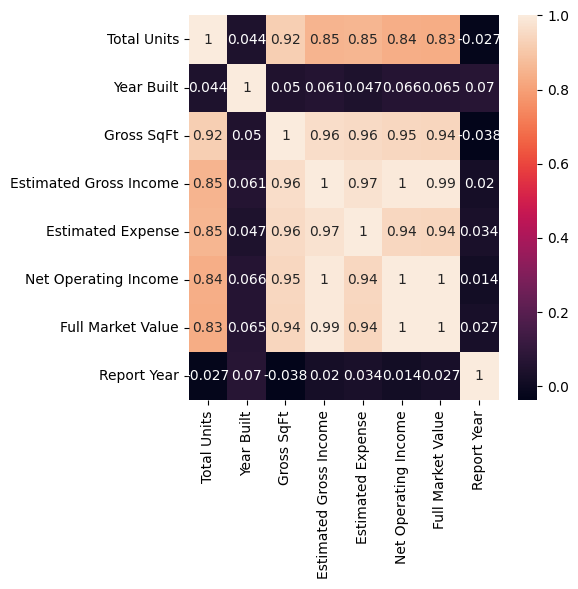

In [193]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

Highest correlations
*   Estimated Expense x Estimate Gross Income
*   Gross Sq Feet x Estimated Expense
*   Gross Sq Feet x Estimate Gross Income
*   Estimate Gross Income x Full Market Value
*   Estimate Gross Income x Net Operating Income
*   Estimate Gross Income x Full Market Value
*   Estimated Expense x Full Market Value
*   Estimated Expense x Net Operating Income
*   Net Operating Income x Full Market Value

Lowest:
*   Report Year
*   Year Built





<Axes: xlabel='Estimated Expense', ylabel='Estimated Gross Income'>

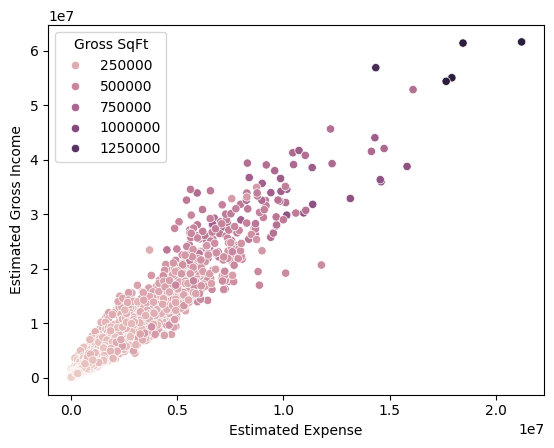

In [173]:
sns.scatterplot(data=data, x="Estimated Expense", y="Estimated Gross Income", hue="Gross SqFt")

<Axes: xlabel='Net Operating Income', ylabel='Full Market Value'>

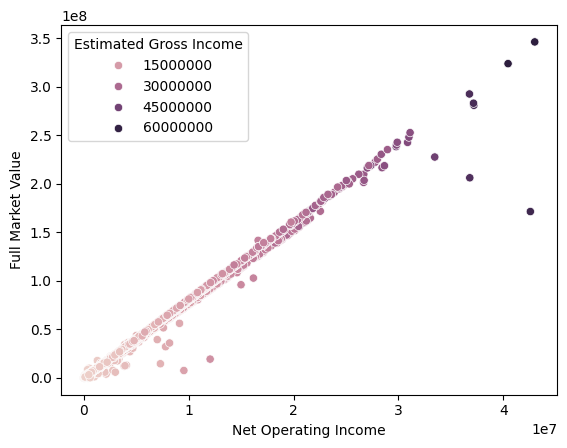

In [149]:
sns.scatterplot(x = "Net Operating Income", y = "Full Market Value", data = data, hue="Estimated Gross Income")

<Axes: xlabel='Year Built', ylabel='Count'>

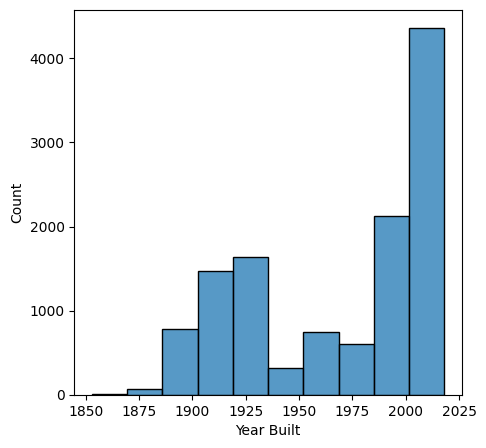

In [152]:
plt.figure(figsize=(5,5))
sns.histplot(x = "Year Built", data = data, bins=10)

<ipython-input-153-acd76faf6f78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = "Neighborhood", y = "Estimated Gross Income", data = data, palette = colors)
<ipython-input-153-acd76faf6f78>:3: UserWarning: 
The palette list has fewer values (10) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.barplot(x = "Neighborhood", y = "Estimated Gross Income", data = data, palette = colors)
<ipython-input-153-acd76faf6f78>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)


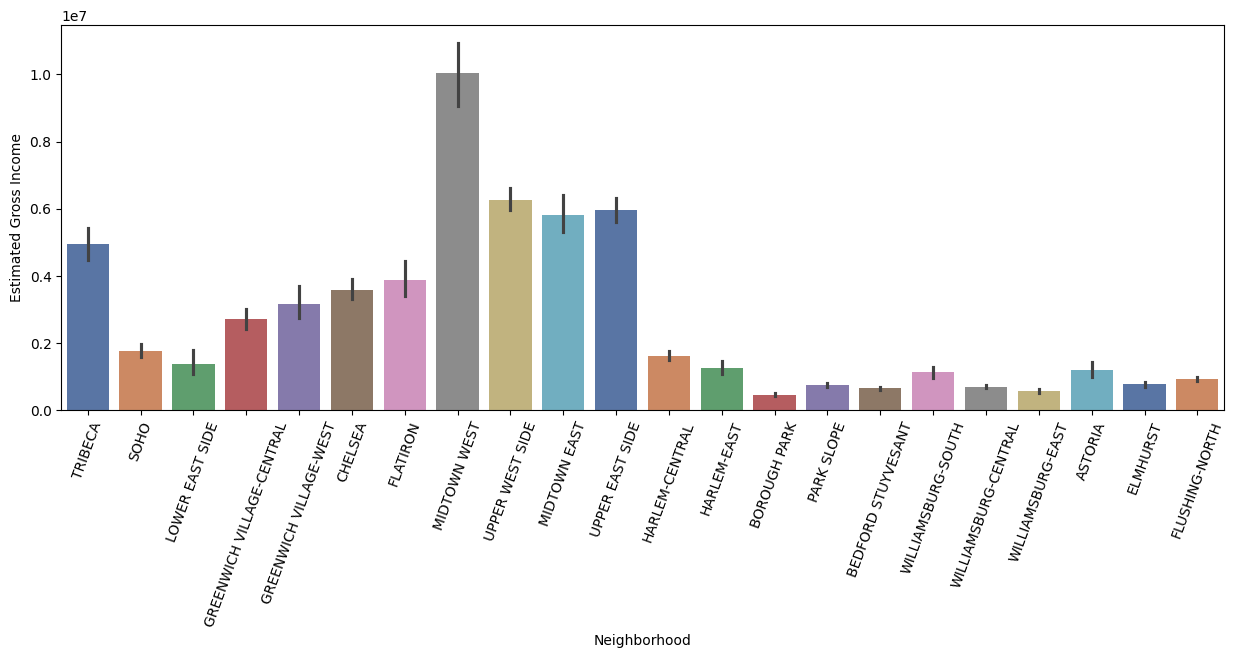

In [153]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("deep")
ax1 = sns.barplot(x = "Neighborhood", y = "Estimated Gross Income", data = data, palette = colors)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=70)
plt.show()

## Scaling Data

In [333]:
scaler = StandardScaler()
data = data.dropna(subset=['Year Built', 'Report Year', 'Full Market Value'])
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_df = data[numerical_cols]
scaled_df=pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_cols)
scaled_df.head()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
0,1.884812,0.423989,1.256694,0.793131,0.129407,1.060295,1.000838,-1.512192
1,0.735781,0.448488,0.533268,0.548750,0.460989,0.576729,0.534903,-1.512192
2,0.475623,0.423989,0.218429,0.268981,0.103902,0.334242,0.092162,-1.512192
3,0.453943,0.448488,0.059544,0.107095,0.043494,0.132181,0.106578,-1.512192
4,1.971531,0.472987,1.586323,1.343308,1.021664,1.456903,1.382981,-1.512192


## K-Means Clustering

In [324]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

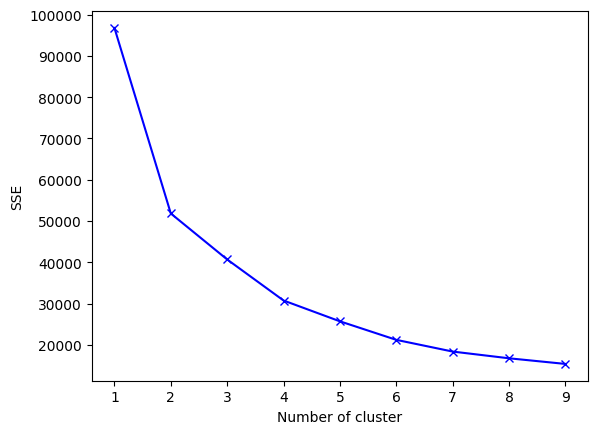

In [325]:
sse = {}
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df)
  sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
# chose between 2 and 8 clusters

In [338]:
df = data.copy()
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(scaled_df)
sdf_copy = scaled_df.copy(deep= True)

sdf_copy['KMeans_Labels'] = kmeans.predict(scaled_df)
df['KMeans_Labels'] = kmeans.predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [339]:
df['KMeans_Labels'].value_counts()

0    9791
1    1905
2     402
Name: KMeans_Labels, dtype: int64

In [340]:
mean = df.groupby('KMeans_Labels').mean()
median = df.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

<ipython-input-340-6ea9857da23b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df.groupby('KMeans_Labels').mean()
<ipython-input-340-6ea9857da23b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = df.groupby('KMeans_Labels').median()


,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Total Units,3.280962e+01,1.631995e+02,3.873731e+02,22.0,152.0,354.0
Year Built,1.965976e+03,1.974757e+03,1.976055e+03,1987.0,1986.0,1985.0
Gross SqFt,4.027762e+04,2.005824e+05,5.035184e+05,29153.0,187906.0,454272.0
Estimated Gross Income,1.313480e+06,8.370908e+06,2.276568e+07,855672.0,7516002.0,20010517.0
Estimated Expense,4.250396e+05,2.621201e+06,6.630593e+06,280770.0,2421342.0,5955068.5
Net Operating Income,8.884405e+05,5.749707e+06,1.613509e+07,561902.0,5112871.0,14402181.5
Full Market Value,6.914254e+06,4.504882e+07,1.263242e+08,4311997.0,40132000.0,112289030.0
Report Year,2.015455e+03,2.015490e+03,2.015485e+03,2016.0,2016.0,2016.0


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12098 entries, 4 to 22035
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  12098 non-null  object 
 1   Neighborhood             12098 non-null  object 
 2   Building Classification  12098 non-null  object 
 3   Total Units              12098 non-null  int64  
 4   Year Built               12098 non-null  float64
 5   Gross SqFt               12098 non-null  int64  
 6   Estimated Gross Income   12098 non-null  int64  
 7   Estimated Expense        12098 non-null  float64
 8   Net Operating Income     12098 non-null  int64  
 9   Full Market Value        12098 non-null  float64
 10  Report Year              12098 non-null  int64  
 11  KMeans_Labels            12098 non-null  int32  
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 1.4+ MB


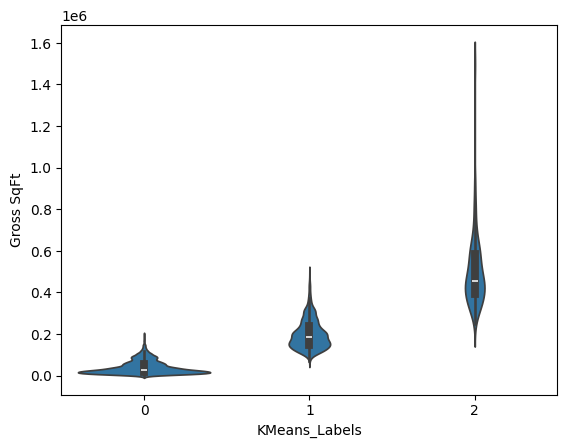

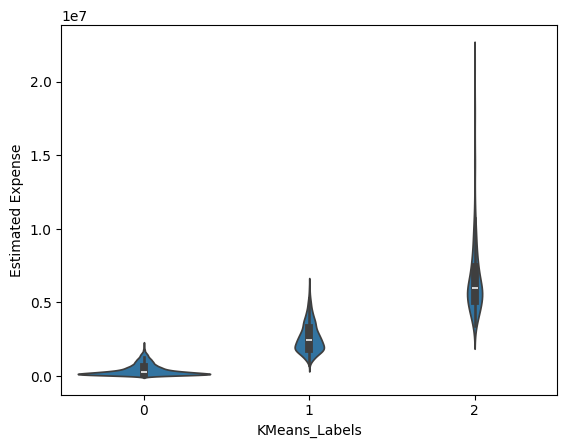

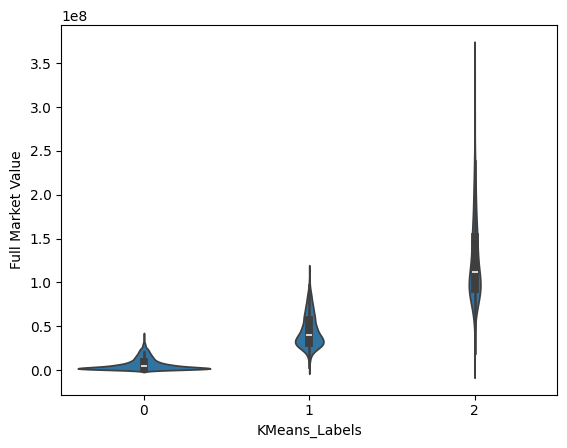

In [355]:
cols = ['Gross SqFt', 'Estimated Expense', 'Full Market Value']

for col in cols:
    sns.violinplot(x = 'KMeans_Labels', y = col, data = df)
    plt.show()

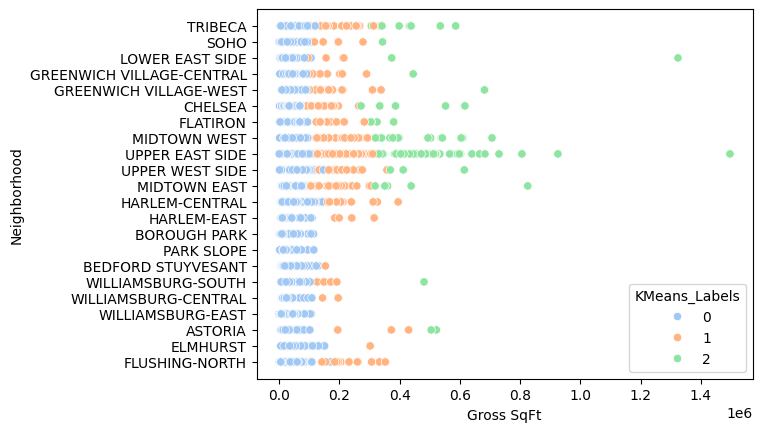

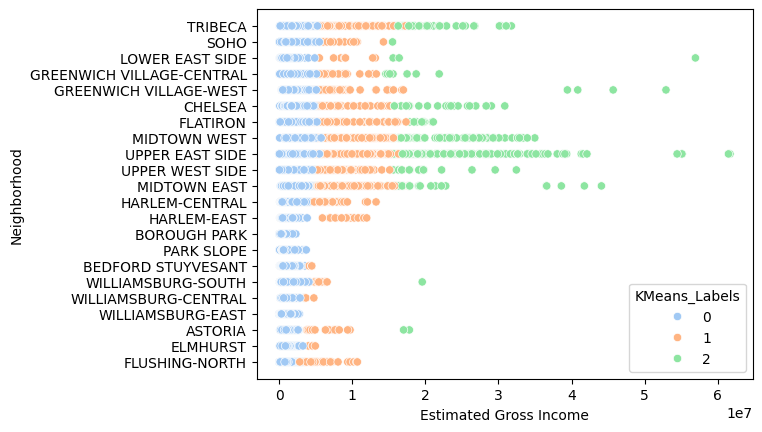

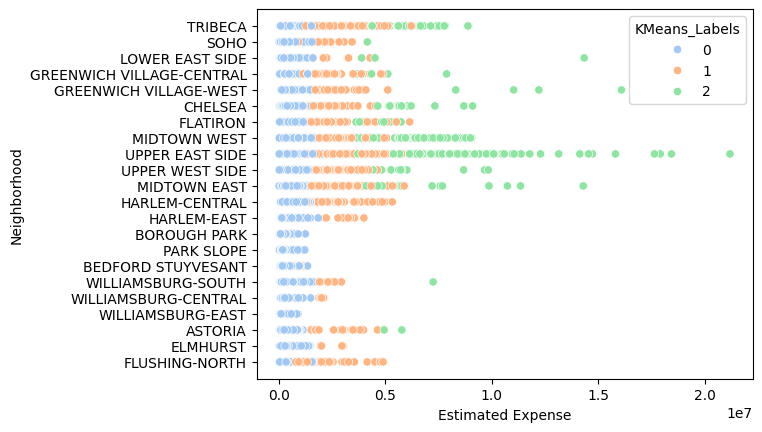

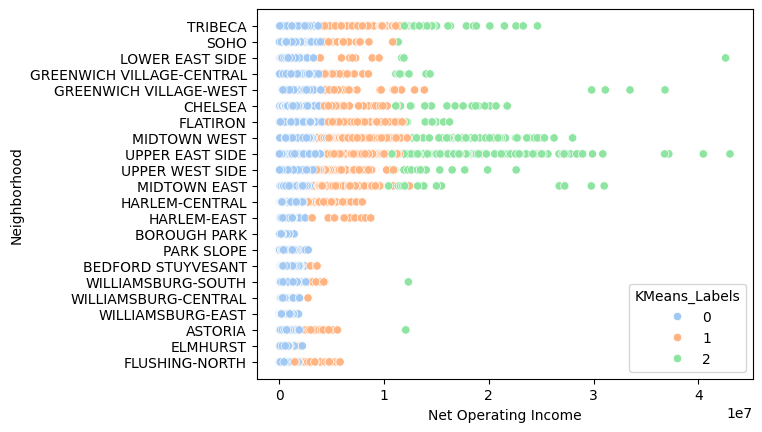

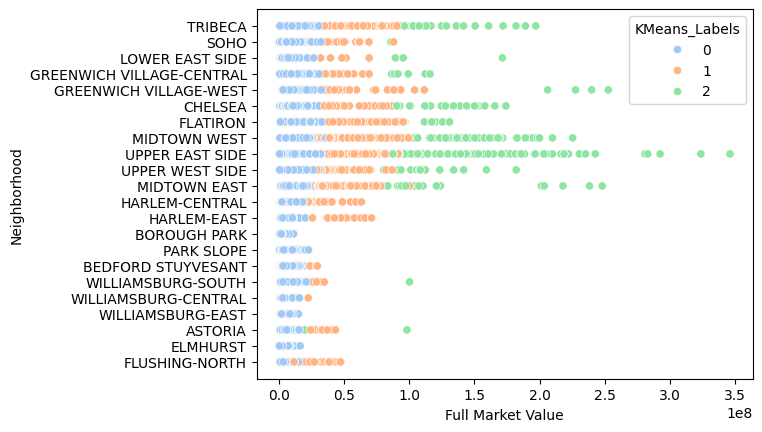

In [353]:
for col in cols:
    sns.scatterplot(x = col, y = 'Neighborhood',data = df ,hue='KMeans_Labels', palette='pastel')
    plt.show()

Cluster 0 -> lowest values, expenses, and size
Cluster 1 -> middle values, expenses, and size
Cluster 2 -> highest values, expenses, and size

## PCA

In [321]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'scaled_df' is your DataFrame
n = scaled_df.shape[1]
print("Number of features: " + str(n))

# Applying PCA
pca = PCA(n_components=n, random_state=1)
pca_data = pd.DataFrame(pca.fit_transform(scaled_df))

# Percent variance
exp_var = pca.explained_variance_ratio_

Number of features: 8


In [322]:
pc_comps = ['PC1', 'PC2', 'PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=numerical_cols)

PC1 -> Gross SqFt, Est. Gross Income, Est. Expense, NOI, Full Market Val
PC2 -> Year Built, Report Year
PC3 -> Year Build, Report Year

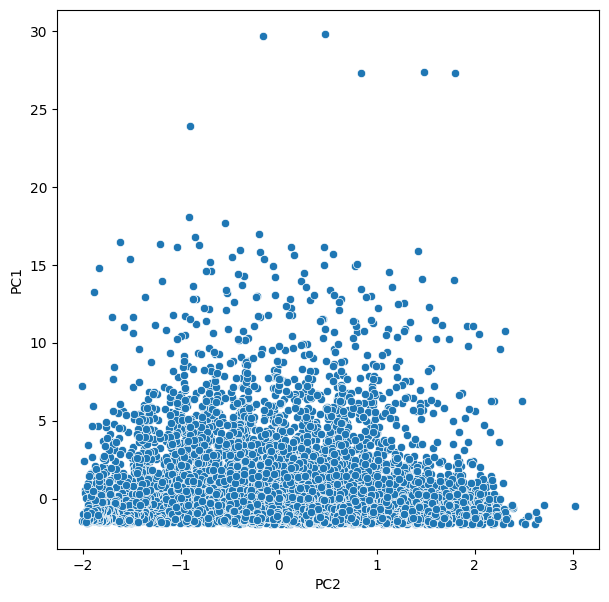

In [323]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=pca_data[1],y=pca_data[0])
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.show()